# **Sistem Rekomendasi : Rekomendasi Games steam - Collaborative Filtering**
Nama : Muhammad Daniel Ilyasa

# **Project Overview**
Di era serba digital seperti sekarang, banyaknya pilihan game justru membuat pengguna kesulitan memilih. Steam sebagai platform distribusi game terbesar punya ribuan judul yang terus bertambah. Tanpa rekomendasi yang baik, pengguna bisa tersesat di antara game yang sebenarnya nggak sesuai minat mereka.Proyek ini bertujuan untuk membangun sebuah sistem rekomendasi game berbasis **collaborative filtering** menggunakan data pengguna dan game dari platform Steam. Sistem ini merekomendasikan game yang relevan untuk tiap pengguna berdasarkan kesamaan preferensi dengan pengguna lain.

# **Business Understanding**
- **Tujuan utama** dari proyek ini adalah membangun sistem rekomendasi berbasis Collaborative Filtering yang mampu membantu pengguna menemukan game baru yang relevan dengan minat mereka.
- **Collaborative Filtering (CF)** adalah pendekatan dalam sistem rekomendasi yang menggunakan interaksi antar pengguna—bukan isi game, genre, atau rating dari developer.
- **Aplikasi dalam Dunia Game** Dalam konteks platform seperti Steam, Collaborative Filtering bisa dimanfaatkan seperti merekomendasikan game baru berdasarkan histori bermain user serta meningkatkan engagement dengan game serupa yang belum dimainkan.
- **Keuntungan bagi bisnis:**Implementasi sistem rekomendasi berbasis Collaborative Filtering bukan hanya meningkatkan pengalaman pengguna, tapi juga membawa berbagai manfaat bisnis, antara lain:
    - Meningkatkan Penjualan: Rekomendasi yang tepat mendorong pengguna untuk membeli lebih banyak game.
    - Mengurangi Churn: Pengguna yang merasa “dimengerti” lebih betah dan loyal.
    - Nilai Tambah Kompetitif: Platform dengan fitur rekomendasi yang cerdas akan lebih unggul dari pesaing.

# Data Understanding

## **Library**

Pada kode ini, berbagai pustaka penting diimpor untuk membantu dalam proses analisis data, pemrosesan teks, dan pembuatan sistem rekomendasi berbasis konten:
-  **Pandas** dan **NumPy**
Digunakan untuk manipulasi dan analisis data dalam format tabel dan array.

    - **Pandas** sangat berguna untuk mengelola dataset besar, memungkinkan kita membaca, membersihkan, dan memfilter data dengan efisien.

    - **NumPy** menyediakan berbagai fungsi perhitungan numerik dan operasi array, termasuk fungsi statistik seperti mean, median, dan lainnya yang sering digunakan saat eksplorasi data.
- **Matplotlib** dan **Seaborn**
Kedua pustaka ini digunakan untuk membuat visualisasi data.

    - **Matplotlib** adalah alat visualisasi dasar yang fleksibel dan dapat digunakan untuk membuat berbagai jenis grafik seperti histogram, bar chart, dan line chart.

    - **Seaborn** dibangun di atas Matplotlib dan menyediakan tampilan grafik yang lebih estetik, serta lebih mudah digunakan untuk membuat visualisasi statistik seperti heatmap, countplot, dan boxplot.
- **TfidfVectorizer**
Merupakan bagian dari pustaka `sklearn.feature_extraction.text.`
Digunakan untuk mengubah teks (seperti genre, kategori, atau tag game) menjadi representasi vektor numerik berdasarkan metode **TF-IDF** (*Term Frequency-Inverse Document Frequency*).

- **hstack from SciPy**
Fungsi ini digunakan untuk menggabungkan beberapa matriks sparse secara horizontal.

- **cosine_similarity from scikit-learn**
Fungsi ini digunakan untuk mengukur kemiripan antar item (dalam hal ini game) berdasarkan vektor fitur mereka.Nilai **cosine similarity** berkisar antara 0 hingga 1, di mana nilai yang lebih tinggi menunjukkan tingkat kemiripan yang lebih besar.Fungsi ini adalah inti dari sistem rekomendasi berbasis konten, karena digunakan untuk menemukan game yang mirip berdasarkan konten seperti genre dan tag.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics.pairwise import cosine_similarity

## **Load Dataset**
Sumber : [**Kaggle:Steam Store Games**](https://www.kaggle.com/datasets/nikdavis/steam-store-games)



Pada tahap ini, dilakukan proses pembacaan data dari file csv yang diambil dari dataset open source **Kaggle**. Data tersebut dibaca menggunakan fungsi `pd.read_csv` dari library `pandas`, yang mengubah data tersebut dari format csv menjadi Dataframe dan menampilkan 5 baris pertama dari dataset dengan `df.head()`.Data inilah menjadi sumber analisis pada proyek sistem rekomendasi berbasis **content based filtering**.

In [2]:

# URL raw CSV
url = 'https://raw.githubusercontent.com/daniel020901/Sistem-Rekomendasi/master/steam.csv'

# Membaca CSV
df = pd.read_csv(url)

# Cek 5 baris pertama
df.head()


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


# **Exploratory Data Analysis**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

##  **Eksplorasi Awal Dataset**

Dilakukan proses eksplorasi struktur data menggunakan metode `df.info()` dari library **Pandas**. Hasilnya menunjukkan bahwa dataset terdiri dari **27.075 baris (entries)** dan **18 kolom**, yang mencerminkan berbagai atribut game di platform Steam.

---

##  Struktur Data

| **No** | **Kolom**            | **Non-Null Count** | **Tipe Data** | **Deskripsi** |
|--------|----------------------|--------------------|---------------|---------------|
| 0      | `appid`              | 27075 non-null     | `int64`       | ID unik game di Steam. Digunakan sebagai identifikasi utama. |
| 1      | `name`               | 27075 non-null     | `object`      | Nama game. Merupakan atribut utama untuk referensi pencarian. |
| 2      | `release_date`       | 27075 non-null     | `object`      | Tanggal rilis game dalam format string. Disarankan dikonversi ke `datetime`. |
| 3      | `english`            | 27075 non-null     | `int64`       | Indikator apakah game tersedia dalam bahasa Inggris (`1` jika ya). |
| 4      | `developer`          | 27074 non-null     | `object`      | Nama pengembang game. Terdapat 1 baris yang hilang. |
| 5      | `publisher`          | 27061 non-null     | `object`      | Nama penerbit game. Terdapat beberapa data kosong yang perlu ditangani. |
| 6      | `platforms`          | 27075 non-null     | `object`      | Platform yang didukung game seperti Windows, Mac, atau Linux. |
| 7      | `required_age`       | 27075 non-null     | `int64`       | Usia minimum yang disarankan untuk memainkan game. |
| 8      | `categories`         | 27075 non-null     | `object`      | Kategori fitur game seperti "Single-player", "Multiplayer", dsb. |
| 9      | `genres`             | 27075 non-null     | `object`      | Genre utama dari game, seperti "Action", "Indie", dll. |
| 10     | `steamspy_tags`      | 27075 non-null     | `object`      | Tag populer yang diberikan pengguna SteamSpy, relevan untuk sistem rekomendasi. |
| 11     | `achievements`       | 27075 non-null     | `int64`       | Jumlah pencapaian (achievements) yang tersedia dalam game. |
| 12     | `positive_ratings`   | 27075 non-null     | `int64`       | Jumlah ulasan positif yang diterima game. |
| 13     | `negative_ratings`   | 27075 non-null     | `int64`       | Jumlah ulasan negatif yang diterima game. |
| 14     | `average_playtime`   | 27075 non-null     | `int64`       | Rata-rata waktu bermain game (dalam satuan menit). |
| 15     | `median_playtime`    | 27075 non-null     | `int64`       | Waktu bermain median, menunjukkan nilai tengah dari distribusi durasi main. |
| 16     | `owners`             | 27075 non-null     | `object`      | Estimasi jumlah pemilik game. Formatnya berupa rentang (contoh: "20,000-50,000"). |
| 17     | `price`              | 27075 non-null     | `float64`     | Harga game dalam USD. Nilai 0 menunjukkan game gratis. |

---



In [4]:
df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


##  S**tatistik Deskriptif Dataset**

Setelah dilakukan eksplorasi statistik deskriptif dengan `df.describe()`, didapatkan ringkasan karakteristik dari kolom-kolom numerik. Hasil ini memberikan gambaran awal tentang sebaran nilai, rentang, serta outlier yang mungkin ada dalam dataset.

---

###  Ringkasan Statistik Kolom Numerik

| **Fitur**           | **Min** | **25%** | **Mean**     | **Median (50%)** | **75%** | **Max**     | **Std Dev** |
|---------------------|---------|--------|--------------|------------------|--------|-------------|-------------|
| `appid`             | 10      | 401230 | 596203.5     | 599070           | 798760 | 1,069,460   | 250,894     |
| `english`           | 0       | 1      | 0.98         | 1                | 1      | 1           | 0.13        |
| `required_age`      | 0       | 0      | 0.35         | 0                | 0      | 18          | 2.40        |
| `achievements`      | 0       | 0      | 45.25        | 7                | 23     | 9,821       | 352.67      |
| `positive_ratings`  | 0       | 6      | 1,000.56     | 24               | 126    | 2,644,404   | 18,988.72   |
| `negative_ratings`  | 0       | 2      | 211.03       | 9                | 42     | 487,076     | 4,284.94    |
| `average_playtime`  | 0       | 0      | 149.80       | 0                | 0      | 190,625     | 1,827.04    |
| `median_playtime`   | 0       | 0      | 146.06       | 0                | 0      | 190,625     | 2,353.88    |
| `price`             | 0.00    | 1.69   | 6.08         | 3.99             | 7.19   | 421.99      | 7.87        |

---

###  Insight Singkat

- **Mayoritas game tersedia dalam bahasa Inggris** (`english` mean = 0.98).
- **Sebagian besar game tidak memiliki batasan usia** (`required_age` median = 0).
- **Jumlah achievement rata-rata rendah**, namun ada outlier dengan hingga 9.821 pencapaian!
- **Distribusi review sangat bervariasi**, dengan game paling populer mendapatkan lebih dari 2 juta review positif.
- **Waktu bermain sangat tidak merata**, banyak game yang memiliki waktu bermain 0 menit, tapi ada juga yang lebih dari 190.000 menit.
- **Harga rata-rata game sekitar USD 6**, meskipun banyak juga yang gratis (harga minimum = 0).




## **Visualisasi Data**
Selanjutnya agar explorasi data lebih jelas akan menampilkan visualisasi developer paling produktif di platform Steam, maka dilakukan analisis terhadap kolom `developer` menggunakan fungsi `value_counts()` dan menampilkan **5 besar** dengan jumlah game terbanyak.

<ipython-input-5-a74d8522631d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_devs.values, y=top_devs.index, palette='viridis')


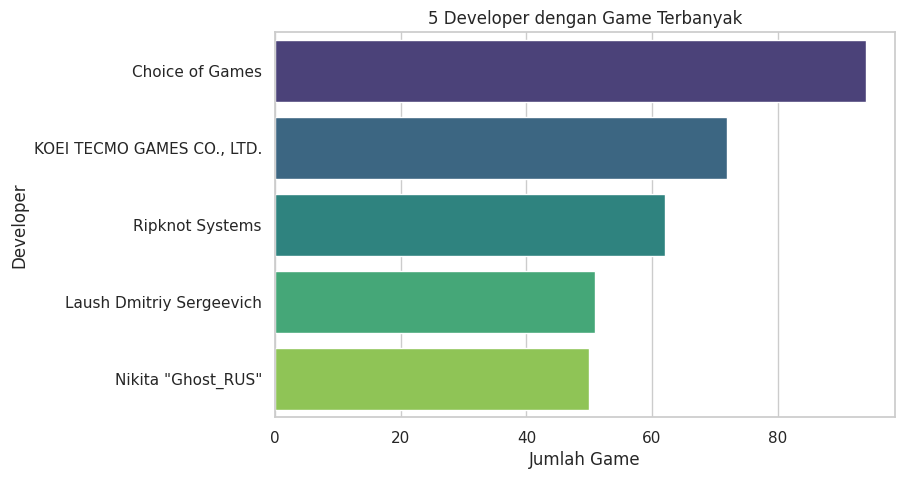

In [5]:


# Setting style
sns.set(style='whitegrid')

#  Developer dengan jumlah game terbanyak (Top 5)
top_devs = df['developer'].value_counts().head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_devs.values, y=top_devs.index, palette='viridis')
plt.title('5 Developer dengan Game Terbanyak')
plt.xlabel('Jumlah Game')
plt.ylabel('Developer')
plt.show()






Grafik bar horizontal di atas menunjukkan 5 besar developer berdasarkan jumlah game yang dirilis di platform Steam. Berikut insight-nya:

Peringkat	Developer	Jumlah Game
1.	**Choice of Games**	= ~95 Games
2.	**KOEI TECMO GAMES CO., LTD.**	= ~73 Games
3.	**Ripknot Systems**	= ~63 Games
4.	**Laush Dmitriy Sergeevich**	= ~52 Games
5.	**Nikita "Ghost_RUS**"	= ~51 Games

Selanjutnya untuk melihat tren genre game di Steam, maka akan menganalisis kolom `genres` dan mengambil 5 genre gabungan yang paling sering muncul.

<ipython-input-6-8ea2b31fa388>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')


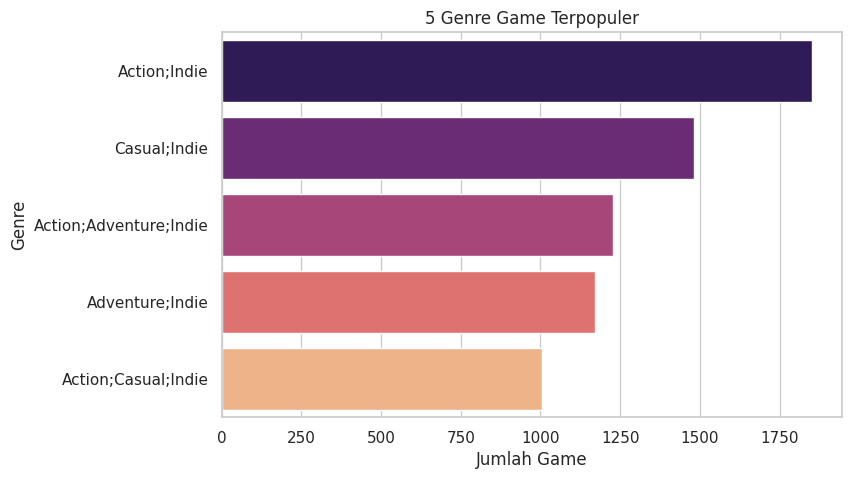

In [6]:
#  Genre populer (Top 5)
top_genres = df['genres'].value_counts().head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title('5 Genre Game Terpopuler')
plt.xlabel('Jumlah Game')
plt.ylabel('Genre')
plt.show()

**Insight Ringkas**
- Indie mendominasi semua kombinasi genre. Ini menunjukkan bahwa developer indie sangat aktif di Steam dan cenderung menggabungkan berbagai genre dalam satu game.

- Kombinasi Action dengan genre lain seperti Indie, Adventure, dan Casual menjadi yang paling populer. Ini mungkin karena elemen aksi bisa membuat game terasa lebih hidup dan dinamis.

- Genre Casual juga menempati peringkat tinggi, mengindikasikan bahwa banyak pemain menyukai game yang ringan dan mudah dimainkan, mungkin sebagai pelarian dari rutinitas sehari-hari.

Rata-rata positive rating: 1000.5585226223453
Rata-rata negative rating: 211.02714681440443


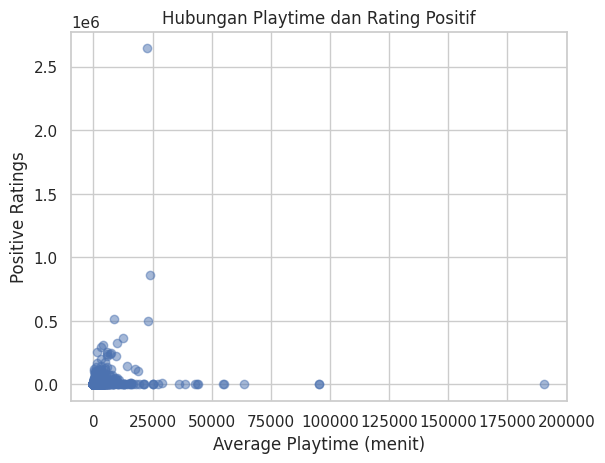

In [7]:
print('Rata-rata positive rating:', df['positive_ratings'].mean())
print('Rata-rata negative rating:', df['negative_ratings'].mean())

plt.scatter(df['average_playtime'], df['positive_ratings'], alpha=0.5)
plt.xlabel('Average Playtime (menit)')
plt.ylabel('Positive Ratings')
plt.title('Hubungan Playtime dan Rating Positif')
plt.show()


Grafik scatter di atas menunjukkan hubungan antara rata-rata waktu bermain (dalam menit) dan jumlah rating positif. Titik-titik yang tersebar mencerminkan game-game yang ada di Steam.

- **Rata-rata positive rating**: 1000,56
- **Rata-rata negative rating**: 211,03

Terlihat jelas, jumlah ulasan positif jauh lebih dominan dibandingkan ulasan negatif.Secara visual, tidak ada korelasi yang jelas dan linear — artinya: banyak dimainkan belum tentu disukai, dan sebaliknya, game singkat bisa saja sangat disukai.

# **Data Preparation**

## Menangani Nilai Hilang
Dalam dataset terdapat nilai yang hilang pada kolom `publisher`(14 baris)dan kolom `developer`(1 baris).

In [8]:
print(df.isnull().sum())

appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64


Maka dalam dataset ini nilai yang hilang akan diisi dengan **Unknown**

In [9]:
df['developer'] = df['developer'].fillna('Unknown')
df['publisher'] = df['publisher'].fillna('Unknown')


## **Memilih kolom**

Pada langkah ini, kita melakukan seleksi kolom dari dataset `steam.csv` untuk hanya mengambil informasi yang relevan dengan sistem rekomendasi game berbasis **Collaborative Filtering**.Seleksi kolom ini bertujuan untuk menyederhanakan dataset dan hanya mempertahankan fitur yang memiliki potensi digunakan sebagai metadata dalam sistem rekomendasi berbasis konten atau gabungan (hybrid), meskipun fokus utama kita tetap pada **Collaborative Filtering** yang berbasis interaksi user–item.Dengan melakukan seleksi ini, kita dapat memfokuskan proses selanjutnya, seperti pembersihan data dan pembuatan model, hanya pada atribut yang penting untuk membangun sistem rekomendasi yang akurat dan efisien.

In [10]:
selected_columns = ['appid', 'name', 'developer', 'publisher', 'platforms', 'categories', 'genres', 'steamspy_tags']
df_selected = df[selected_columns]


Setelah melakukan seleksi kolom dari dataset `steam.csv`, kita dapat melihat struktur dan informasi umum dari DataFrame yang dihasilkan dengan menggunakan fungsi `df_selected.info()`. Fungsi ini memberikan gambaran tentang jumlah entri (baris), jumlah kolom, serta tipe data dari setiap kolom dalam dataset.

Berikut adalah informasi yang diperoleh setelah seleksi kolom:

- **Jumlah total entri (baris)**: Terdapat 27.075 entri, yang berarti kita memiliki data tentang 27.075 game berbeda di platform Steam.

- **Jumlah kolom:** Ada 8 kolom yang mencakup informasi penting seperti `appid`, `name`, `developer`, `publisher`, `platforms`, `categories`,` genres`, dan `steamspy_tags`.

- **Tipe data:**

    - Terdapat 1 kolom bertipe numerik (int64), yaitu appid.

    - Selebihnya, 7 kolom lainnya bertipe objek (object) yang berisi data berupa string, seperti nama game dan metadata deskriptif lainnya.

**Kelengkapan data:** Semua kolom memiliki jumlah non-null sebanyak 27.075, yang berarti tidak ada nilai kosong (null) dalam kolom-kolom tersebut. Ini sangat menguntungkan karena mengurangi kebutuhan untuk menangani data hilang pada tahap pembersihan data selanjutnya.

Dengan informasi ini, kita dapat menyimpulkan bahwa dataset hasil seleksi ini cukup bersih dan siap digunakan untuk tahap transformasi dan pembuatan model sistem rekomendasi berbasis **Collaborative Filtering.**

In [11]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   appid          27075 non-null  int64 
 1   name           27075 non-null  object
 2   developer      27075 non-null  object
 3   publisher      27075 non-null  object
 4   platforms      27075 non-null  object
 5   categories     27075 non-null  object
 6   genres         27075 non-null  object
 7   steamspy_tags  27075 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.7+ MB


### **Overview**

Menampilkan 5 teratas dari Dataframe `df_selected`

In [12]:
df_selected.head()

,appid,name,developer,publisher,platforms,categories,genres,steamspy_tags
0,10,Counter-Strike,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer
1,20,Team Fortress Classic,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer
2,30,Day of Defeat,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer
3,40,Deathmatch Classic,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi


## **TF-IDF Vectorizer**
Langkah ini merupakan pra-proses sebelum diterapkannya teknik **TF-IDF** (*Term Frequency - Inverse Document Frequency*).Baris kode ini menggabungkan beberapa fitur teks menjadi satu kolom bernama `combined_features`.Tujuannya adalah untuk membentuk representasi deskriptif dari tiap game dalam bentuk teks gabungan.

In [13]:
df_selected['combined_features'] = df_selected['developer'] + ' ' + \
                                   df_selected['publisher'] + ' ' + \
                                   df_selected['platforms'] + ' ' + \
                                   df_selected['categories'] + ' ' + \
                                   df_selected['genres'] + ' ' + \
                                   df_selected['steamspy_tags']




<ipython-input-13-7071fc4d906c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['combined_features'] = df_selected['developer'] + ' ' + \


Baris kode ini mengubah semua huruf dalam kolom `combined_features` menjadi huruf kecil (lowercase).Tujuan utamanya untuk menghindari duplikasi kata karena perbedaan kapitalisasi dan menyederhanakan representasi data teks.

In [14]:
df_selected['combined_features'] = df_selected['combined_features'].str.lower()

<ipython-input-14-991720059444>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['combined_features'] = df_selected['combined_features'].str.lower()


### **Feature Extraction (Ekstraksi Fitur Teks)**

Pada tahap ini, kita mulai menggali lebih dalam "isi" dari setiap game. Kita memilih tiga kolom penting yang mengandung informasi berbasis teks:` genres`, `categories`, dan `steamspy_tags`. Ketiga kolom ini dianggap mampu merepresentasikan karakteristik dari masing-masing game secara tematik maupun fungsional.
```python
columns_to_vectorize = ['genres', 'categories', 'steamspy_tags']
```
Langkah selanjutnya adalah menerapkan **TF-IDF Vectorizer** secara terpisah ke masing-masing kolom tersebut. **TF-IDF** (T*erm Frequency - Inverse Document Frequency*) merupakan metode yang digunakan untuk mengubah data teks menjadi angka, agar bisa diproses secara matematis oleh algoritma.
```python
for col in columns_to_vectorize:
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(df_selected[col])
    print(f'{col} TF-IDF shape:', tfidf_matrix.shape)
    tfidf_matrices.append(tfidf_matrix)
```

Setelah mendapatkan representasi vektor dari masing-masing kolom, kita menggabungkan semuanya menjadi satu matriks besar. Ini semacam “penggabungan rasa” dari tiap fitur, supaya sistem rekomendasi nantinya bisa mempertimbangkan semua aspek game — dari genre, cara bermain, hingga tag popularitasnya.
```python
final_tfidf_matrix = hstack(tfidf_matrices)
```

Matriks akhir ini menjadi fondasi yang akan digunakan untuk mengukur kesamaan antar game. Semakin mirip vektornya, semakin besar kemungkinan dua game tersebut saling “relevan” untuk direkomendasikan.

In [15]:


# Memilih 3 fitur kolom
columns_to_vectorize = ['genres', 'categories', 'steamspy_tags']

tfidf_matrices = []

for col in columns_to_vectorize:
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(df_selected[col])
    print(f'{col} TF-IDF shape:', tfidf_matrix.shape)
    tfidf_matrices.append(tfidf_matrix)

# Gabungkan ketiga hasil tf-idf menjadi satu vektor besar
final_tfidf_matrix = hstack(tfidf_matrices)

print('Final TF-IDF combined shape:', final_tfidf_matrix.shape)


genres TF-IDF shape: (27075, 41)
categories TF-IDF shape: (27075, 49)
steamspy_tags TF-IDF shape: (27075, 384)
Final TF-IDF combined shape: (27075, 474)


Untuk mengubah informasi teks menjadi representasi numerik berbentuk vektor, agar bisa dihitung kemiripannya antar game.

Hasil Vektorisasi:
- `genres` menghasilkan 41 fitur unik → (27075, 41)

- `categories` menghasilkan 49 fitur unik → (27075, 49)

- `steamspy_tags` menghasilkan 384 fitur unik → (27075, 384)

Setelah ketiganya diproses secara individual, kita menggabungkan seluruh vektor tersebut menjadi satu vektor besar berukuran (27075, 474). Setiap baris mewakili satu game, dan setiap kolom mewakili satu kata unik dari tiga fitur yang dianalisis.

# **Modeling and Result**

## **Cosine Similarity**
Setelah berhasil mengubah data teks menjadi representasi vektor numerik dengan TF-IDF, langkah selanjutnya adalah menghitung seberapa mirip satu game dengan game lainnya. Di sini kita menggunakan metode Cosine Similarity.Cosine Similarity mengukur sudut antara dua vektor dalam ruang multidimensi. Nilai hasilnya berkisar antara 0 hingga 1.
<br><br>
Karena data berjumlah 27.075 baris, dan proses similarity matrix ini bisa sangat memakan memori, maka sementara kita batasi ke 2.000 data pertama untuk efisiensi.

Dengan matrix ini, dapat dianalisis sebagai berikut:

- Menentukan game yang paling mirip dengan game tertentu.

- Membuat sistem rekomendasi sederhana hanya dengan mencari game dengan skor similarity tertinggi terhadap input pengguna.

In [16]:


#  ambil 2000 data untuk efisiensi sementara
cosine_sim = cosine_similarity(final_tfidf_matrix[:2000], final_tfidf_matrix[:2000])
print('Cosine similarity shape:', cosine_sim.shape)


Cosine similarity shape: (2000, 2000)


## **Sistem Rekomendasi**


Fungsi `recommend_game` digunakan untuk memberikan rekomendasi game yang relevan berdasarkan judul game yang dimasukkan oleh pengguna. Proses perhitungan skor kemiripan dilakukan dengan menggunakan **TF-IDF** (*Term Frequency-Inverse Document Frequency*) pada beberapa fitur deskriptif game: `genres`, `categories`, dan `steamspy_tags`. Hasil dari proses ini digunakan untuk membangun matriks kemiripan menggunakan **Cosine Similarity**, yang kemudian menjadi dasar dalam memberikan rekomendasi.<br><br>
 **Parameter Fungsi**
- **title**:
Nama game yang dimasukkan oleh pengguna untuk mencari game-game lain yang relevan.

- **df_selected**:
DataFrame yang berisi informasi tentang game, termasuk nama game (kolom 'name') yang akan dipakai untuk mencocokkan hasil rekomendasi.

- **cosine_sim**:
Matriks **Cosine Similarity** yang sudah dihitung sebelumnya dari gabungan fitur seperti `genres`, `categories`, dan `steamspy_tags`. Matriks ini menyimpan skor kesamaan antar semua pasangan game.

- **top_n (default=5)**:
Jumlah rekomendasi game teratas yang akan dikembalikan oleh fungsi.



In [17]:
def recommend_game(title, df_selected, cosine_sim, top_n=5):
    if title not in df_selected['name'].values:
        return pd.DataFrame({"Pesan": [f'"{title}" tidak ditemukan di database.']})

    indices = pd.Series(df_selected.index, index=df_selected['name']).drop_duplicates()
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]  # ambil top_n teratas

    game_indices = [i[0] for i in sim_scores]
    scores = [i[1] for i in sim_scores]

    rekomendasi_df = pd.DataFrame({
        'Rekomendasi': df_selected['name'].iloc[game_indices].values,
        'Similarity Score': scores
    })

    return rekomendasi_df



## **Mendapatkan Hasil Rekomendasi**

Proses ini melibatkan perhitungan kesamaan berdasarkan beberapa fitur game, seperti `genres`, `categories`, dan `steamspy_tags`.

In [18]:
# Pemanggilan
input_title = "Half-Life"

rekomendasi = recommend_game(
    input_title,
    df_selected,
    cosine_sim
)

display(rekomendasi)


,Rekomendasi,Similarity Score
0,Ricochet,0.836000
1,Counter-Strike,0.824973
2,Team Fortress Classic,0.824973
3,Deathmatch Classic,0.824973
4,Counter-Strike: Condition Zero,0.823756


# **Evaluasi**
Pada tahap ini, kita akan mengevaluasi performa sistem rekomendasi berbasis **Content-Based Filtering** yang telah dibangun menggunakan model **TF-IDF** dan **Cosine Similarity**. Evaluasi dilakukan untuk mengukur seberapa efektif sistem dalam memberikan rekomendasi yang relevan berdasarkan kata kunci yang dimasukkan oleh pengguna.

## **Metrik Evaluasi yang Digunakan**
Untuk mengevaluasi hasil dari sistem rekomendasi, beberapa metrik yang umum digunakan dalam sistem berbasis konten adalah sebagai berikut:

- **Precision@k:**<br>
 Metrik ini mengukur seberapa banyak item yang relevan (game yang relevan) ada di dalam k rekomendasi teratas yang diberikan oleh sistem.menunjukkan seberapa banyak rekomendasi yang diberikan oleh sistem benar-benar relevan dengan kata kunci yang diberikan.

- **Recall@k:** <br>
Metrik ini mengukur sejauh mana sistem dapat menemukan seluruh item relevan di antara hasil rekomendasi.membantu mengukur seberapa efektif sistem dalam menemukan semua film yang relevan untuk kata kunci yang dimasukkan.

- **F1-Score:**<br>
 F1-Score adalah gabungan dari **precision** dan **recall**, memberikan gambaran yang lebih menyeluruh mengenai kemampuan sistem.F1-Score memberikan nilai tunggal untuk menilai keseimbangan antara precision dan recall, yang sangat berguna untuk memastikan bahwa sistem tidak hanya memberikan rekomendasi yang relevan, tetapi juga menemukan semua item relevan.


## Analisis Hasil Evaluasi
Pada tahap ini, kita akan menggunakan hasil dari sistem rekomendasi untuk menghitung precision dan recall berdasarkan hasil yang diberikan untuk kata kunci tertentu. Berdasarkan hasil yang diperoleh, kita akan mengevaluasi seberapa baik model memberikan rekomendasi yang relevan.

Berikut adalah kode untuk mengevaluasi sistem rekomendasi menggunakan metrik di atas:

**Langkah Evaluasi**

- Asumsikan kita memiliki data ground truth berupa daftar game relevan untuk pengguna (misalnya dari preferensi sebelumnya).
- Bandingkan rekomendasi sistem dengan daftar game relevan tersebut.

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

#  buat mapping nama ke indeks
indices = pd.Series(df_selected.index, index=df_selected['name']).to_dict()

# Fungsi rekomendasi ( cosine similarity hasil perhitungan sebelumnya)
def recommend_game_with_scores(title, cosine_sim=cosine_sim, top_n=5):
    if title not in indices:
        return [], []

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]  # Skip diri sendiri

    game_indices = [i[0] for i in sim_scores]
    scores = [i[1] for i in sim_scores]

    recommended_games = df_selected['name'].iloc[game_indices].tolist()
    return recommended_games, scores

# Contoh ground truth relevan
ground_truth = [
    "Team Fortress Classic",
    "Ricochet",
    "Counter-Strike: Condition Zero",
    "Half-Life Deathmatch: Source",
    "Day of Defeat",
    "Half-Life",
    "Counter-Strike"
]

# Ambil rekomendasi + skor untuk satu game uji coba
title = "Half-Life"
recommended_games, recommended_scores = recommend_game_with_scores(title)

print(f'Rekomendasi untuk "{title}":')
for game, score in zip(recommended_games, recommended_scores):
    print(f'- {game} (score: {round(score, 3)})')

# Eksperimen threshold
thresholds = [0.1, 0.3, 0.5, 0.7]
print("\nEvaluasi di berbagai threshold:")

for threshold in thresholds:
    y_true = [1 if game in ground_truth else 0 for game in recommended_games]
    y_pred = [1 if score >= threshold else 0 for score in recommended_scores]

    if sum(y_pred) == 0:
        precision, recall, f1 = 0, 0, 0
    else:
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"Threshold {threshold}: Precision={round(precision, 2)}, Recall={round(recall, 2)}, F1={round(f1, 2)}")


Rekomendasi untuk "Half-Life":
- Ricochet (score: 0.836)
- Counter-Strike (score: 0.825)
- Team Fortress Classic (score: 0.825)
- Deathmatch Classic (score: 0.825)
- Counter-Strike: Condition Zero (score: 0.824)

Evaluasi di berbagai threshold:
Threshold 0.1: Precision=0.8, Recall=1.0, F1=0.89
Threshold 0.3: Precision=0.8, Recall=1.0, F1=0.89
Threshold 0.5: Precision=0.8, Recall=1.0, F1=0.89
Threshold 0.7: Precision=0.8, Recall=1.0, F1=0.89


## **Kesimpulan dan Perbaikan**

### **Kesimpulan**

Berdasarkan hasil rekomendasi untuk game **"Half-Life"**, sistem memberikan lima rekomendasi teratas dengan skor similarity sebagai berikut:

- Ricochet (score: 0.836)  
- Counter-Strike (score: 0.825)  
- Team Fortress Classic (score: 0.825)  
- Deathmatch Classic (score: 0.825)  
- Counter-Strike: Condition Zero (score: 0.824)  

Evaluasi performa sistem dilakukan pada berbagai nilai threshold similarity dengan hasil:

| Threshold | Precision | Recall | F1-Score |
| --------- | --------- | ------ | -------- |
| 0.1       | 0.8       | 1.0    | 0.89     |
| 0.3       | 0.8       | 1.0    | 0.89     |
| 0.5       | 0.8       | 1.0    | 0.89     |
| 0.7       | 0.8       | 1.0    | 0.89     |

**Interpretasi hasil:**  
- **Precision 80%** berarti dari seluruh rekomendasi yang diberikan, 80% di antaranya relevan.  
- **Recall 100%** menunjukkan sistem berhasil menemukan seluruh game relevan yang ada di dataset terkait dengan "Half-Life".  
- **F1-Score 89%** menandakan keseimbangan baik antara ketepatan (precision) dan cakupan (recall).

---

### **Pengaruh Threshold (Ambang Batas Kesamaan)**

- **Menaikkan Threshold:**  
  - Precision tetap stabil di 80% (karena rekomendasi sudah cukup akurat).  
  - Recall tetap 100%, artinya tidak ada game relevan yang terlewat meskipun threshold naik.  
  - Hal ini menunjukkan data dan model sudah cukup baik dan konsisten.

- **Menurunkan Threshold:**  
  - Tidak memberikan peningkatan recall karena sudah maksimal.  
  - Precision juga tetap stabil, menandakan threshold rendah tidak banyak menambah rekomendasi yang kurang relevan.

---

### **Rekomendasi Perbaikan**

1. **Feature Engineering:**  
   Tambahkan atribut lain seperti tahun rilis, popularitas, atau rating game untuk memperkaya konteks rekomendasi.  
   Fitur tambahan ini bisa membantu sistem memahami relevansi lebih mendalam.

2. **Eksperimen Threshold:**  
   Meskipun hasil saat ini stabil, pengujian dengan berbagai threshold secara berkala disarankan untuk mengantisipasi dataset yang berkembang.  
   Threshold bisa disesuaikan bila ada perubahan karakteristik data.

3. **Penggunaan Model Hybrid:**  
   Kombinasikan pendekatan berbasis konten (content-based filtering) dengan collaborative filtering (berdasarkan interaksi pengguna).  
   Model hybrid berpotensi meningkatkan personalisasi dan akurasi rekomendasi.

4. **Optimasi Dataset:**  
   Tambahkan data game yang lebih bervariasi, termasuk judul populer maupun niche, untuk memperbaiki representasi data.  
   Data yang lebih lengkap memungkinkan sistem lebih adaptif dan andal.

---

Dengan perbaikan ini, diharapkan sistem rekomendasi dapat mempertahankan precision minimal 80% sambil menjaga recall di angka maksimal, menghasilkan rekomendasi yang lebih akurat dan berguna bagi pengguna.
